<a href="https://colab.research.google.com/github/kittimaxz/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [191]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [192]:
Name = 'กิตติมา อุปสุข'
ID = '6230210409'

In [193]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [194]:
Data = DataGenerator(Name,ID)

021:22:11


In [195]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-0.889351,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408,-11.231579,-7.375703,-54.157893
1,6.888596,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802,-1.858061,-12.649810,-7.290306
2,8.017362,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799,5.240675,16.947207,28.203376
3,-5.259314,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771,1.137825,15.069006,7.689124
4,11.803001,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335,-0.672218,-10.747753,-1.361092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.386310,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545,-0.350062,0.287322,0.249688
9996,-5.933911,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200,1.544812,15.730721,9.724062
9997,-9.191507,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357,3.287883,-10.097935,18.439417
9998,-2.169208,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183,2.210728,22.839871,13.053641


เตรียมข้อมูลก่อนที่จะนำไปใช้ โดยการตัดตัวที่มี correlation กันออกไปก่อน เพื่อลดข้อมูลที่เหมือนกันออกจาก  Data

In [196]:
Data.shape ###ดูขนาดของข้อมูล Data

(10000, 24)

In [197]:
corr=np.corrcoef(Data.to_numpy().T)

In [198]:
corr.shape ###ดูขนาดของ corrcoef ของ Data

(24, 24)

ทำการวนลูปหาค่า correlation ที่ซ้ำกัน เพื่อนำค่าที่ซ้ำกันออก

In [199]:
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (i != j) and (corr[i,j] == 1.):
      print (f' row={i} column={j} corrcoef={corr[i,j]}')

 row=1 column=22 corrcoef=1.0
 row=21 column=23 corrcoef=1.0
 row=22 column=1 corrcoef=1.0
 row=23 column=21 corrcoef=1.0


จากการวนลูป จะเห็นได้ว่ามี correlation ที่ซ้ำกันอยู่ 2 ค่า ดังนั้นจึงต้องทำการนำข้อมูลที่ซ้ำกันออกก่อน จึงจะนำข้อมูลไปใช้ได้

In [200]:
new_Data=Data.iloc[:,1:21]
new_Data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-3.687852,5.854784,-3.415873,-5.610665,-2.582173,3.694650,-5.062654,-4.586200,6.457132,2.304650,4.329046,7.206710,-5.144610,-1.245484,-7.250447,9.249019,4.797001,5.020432,-3.889117,8.994408
1,-6.324905,-5.740092,5.299575,-2.842515,2.372734,7.933971,-9.659946,6.361068,-10.214856,0.338380,-1.412124,3.624184,4.602672,-8.628475,-7.482172,-0.471848,5.111467,-7.731085,2.441740,-7.366802
2,8.473604,3.038962,-6.893468,-7.191756,-2.181812,-8.602517,1.635662,-4.501795,-8.114539,-6.316734,-4.982942,1.302537,-2.022844,0.086704,-2.306383,-8.802485,-6.781084,-3.476832,-4.668904,-9.690799
3,7.534503,7.437431,4.414411,-0.059253,-7.445860,-4.424710,-3.564299,-3.465228,-0.862653,2.011504,-4.724475,6.885026,4.804179,7.909228,-4.198045,4.079989,2.923757,-2.001206,-2.269056,6.894771
4,-5.373877,-6.309848,5.999780,-2.165905,3.767224,8.701775,-8.471486,5.789175,-9.041266,0.967662,-0.752092,4.443130,3.572116,-9.602990,-7.327553,2.603626,3.287083,-6.879058,1.562324,-6.132335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.143661,7.034918,8.043940,6.736725,6.999241,4.103643,-2.564332,-3.517837,6.354337,-7.514451,-2.221127,-5.829928,2.024862,6.591702,-3.938688,6.786948,5.749472,2.184205,-5.268825,6.337545
9996,7.865360,7.554697,5.966666,-0.086257,-5.588988,-3.534003,-2.527750,-4.761734,-0.426129,1.003535,-6.136890,5.449768,3.955082,6.685563,-6.451825,3.396171,3.630983,-1.397212,-3.044932,5.194200
9997,-5.048968,4.294216,-9.342154,-7.362920,-9.229852,-4.192468,3.754275,-2.734278,4.230375,-9.031066,7.426534,-6.797743,-5.650139,2.036746,8.826735,5.432167,9.468526,6.800718,-1.900056,-3.067357
9998,11.419935,-5.335483,3.089792,8.711882,6.311260,-4.494053,11.339766,-1.473491,10.446842,-9.495673,9.596118,5.562927,-7.996054,4.785754,-5.670202,1.141286,0.046121,-7.345678,5.898585,8.302183


**ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**Clustering**

**K-mean**

***import***

In [201]:
from sklearn.cluster import KMeans

***define***

In [202]:
kmeans=KMeans(n_clusters=3,random_state=2021)

***fit-transform***

คำนวณหาจุด cluster center ของข้อมูล data ด้วยวิธี K-Means Clustering

In [203]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [204]:
kmeans.cluster_centers_

array([[  4.92887089,   1.09010258,   5.08006368,  -1.55116268,
          1.29812358,   1.09438582,  -2.89774424,  -0.43101719,
         -1.65886567,   3.76762652,  -0.62245426,   0.95405381,
          1.45852145,   0.51397039,   2.78079752,  -6.83176488,
          7.13784822,   5.98129275,   3.85679315,  -5.68437279,
          3.11257487,  -6.67126579,   2.18020515, -31.35632896],
       [  1.77826918,  -1.93689923,   1.18278694,   0.75459641,
         -3.51378993,  -1.15094849,   4.53556567,  -3.65577794,
         -2.91347647,  -4.21253118,  -1.23707381,   0.5204196 ,
          0.51974662,  -3.20495773,  -0.48520761,  -1.93568619,
          4.44815547,   1.92379895,   1.73610812,  -1.28144432,
         -0.15122804,   1.11902076,  -3.87379847,   7.5951038 ],
       [  0.62510569,   8.14442613,   2.31822096,   1.19925245,
          0.8895622 ,  -1.77311166,  -5.1950023 ,   1.77496889,
         -3.46651138,   0.1359663 ,  -4.2693267 ,  -0.1792533 ,
          4.81999339,  -2.75716895,   

ทำสอบการจัดกลุ่มของ Data

In [205]:
y=kmeans.predict(Data)
y

array([0, 1, 2, ..., 1, 2, 2], dtype=int32)

ทำ PCA ข้อมูล Data 

In [206]:
from sklearn.decomposition import PCA

In [207]:
pca=PCA(n_components=2)

In [208]:
new_pca=pca.fit_transform(Data)

In [209]:
import matplotlib 

In [210]:
matplotlib.rcParams['figure.figsize']=[10,15]

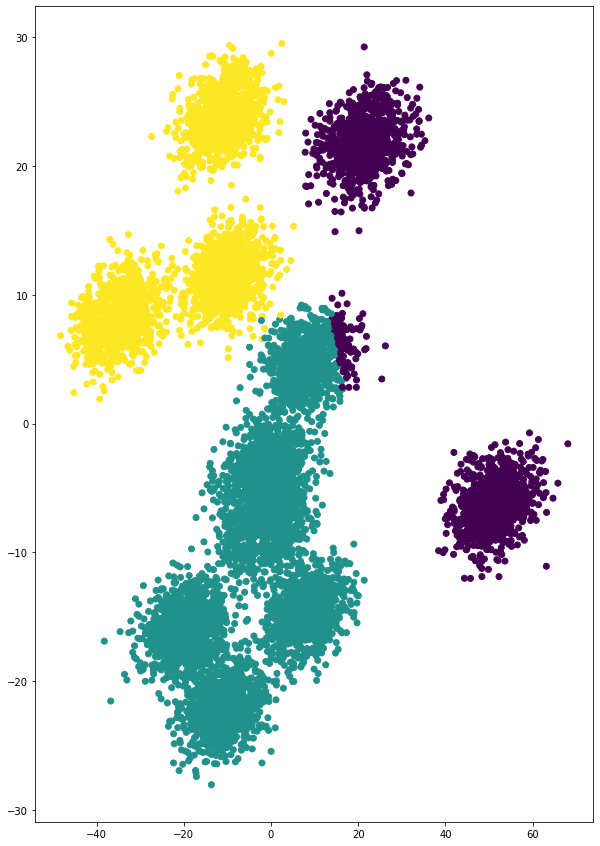

In [212]:
kmeans=KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y=kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

In [213]:
pca=PCA(n_components=2)

In [215]:
new_data_pca = pca.fit_transform(kmeans.cluster_centers_)
new_data_pca

array([[ 31.45196221,  -4.39503777],
       [ -7.75566747,  15.20509001],
       [-23.69629474, -10.81005224]])

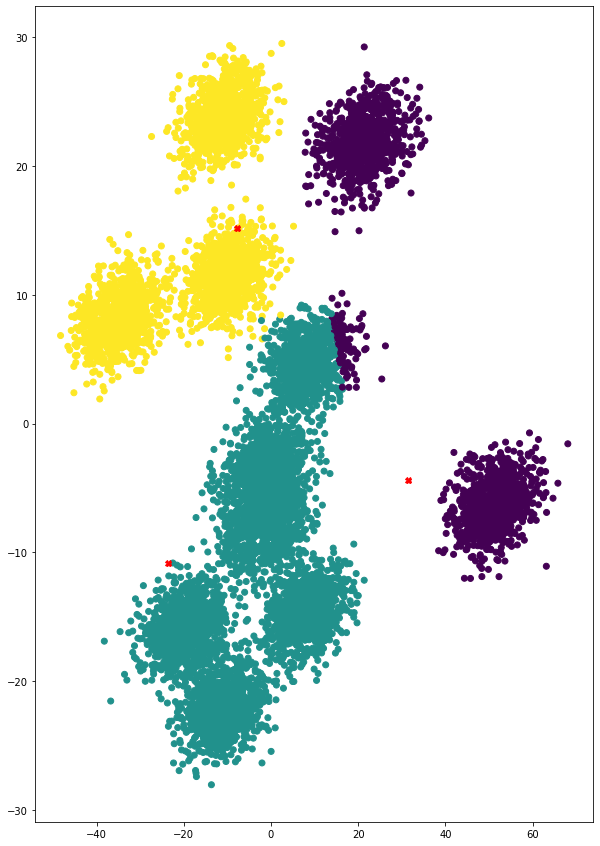

In [228]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.plot(new_data_pca[:,0],new_data_pca[:,1],'Xr')

**Elbow Method**

**SSE**

In [218]:
kmeans.inertia_ ###SSE คือ Sum of Squared Error

7022214.192783495

In [219]:
SSE=list()
for k in [1,2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(Data)
  SSE.append(kmeans.inertia_)

In [220]:
SSE

[11957322.79958456,
 8702496.394593643,
 7022214.192783495,
 5664542.793044245,
 4323475.685648333,
 3392931.4484599875,
 2684949.6732077827,
 2063455.4084842256]

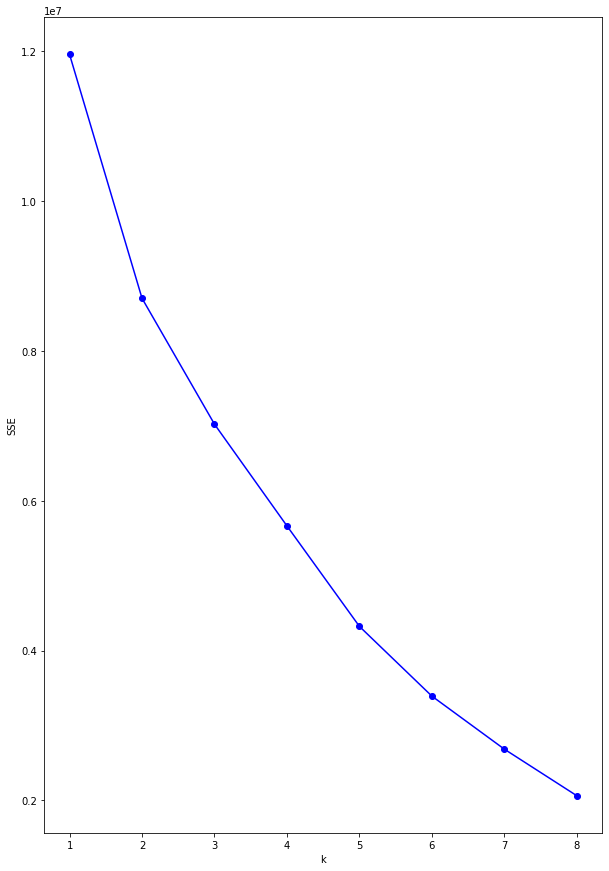

In [221]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟข้างต้นจะเห็นได้ว่า k มีทั้งหมด 5กลุ่ม ซึ่งดูจากจุดที่ 6 เริ่มมีความแตกต่างออกไปจากระยะห่างระหว่างจุดที่อยู่ใกล้กัน

**Silhouette coeffient**

In [222]:
from sklearn import metrics

In [223]:
SilH=list()
for k in [2,3,4,5,6,7,8]:
  kmeans=KMeans(n_clusters=k,random_state=2021)
  kmeans.fit(Data)
  score=metrics.silhouette_score(Data,kmeans.labels_)
  SilH.append(score)

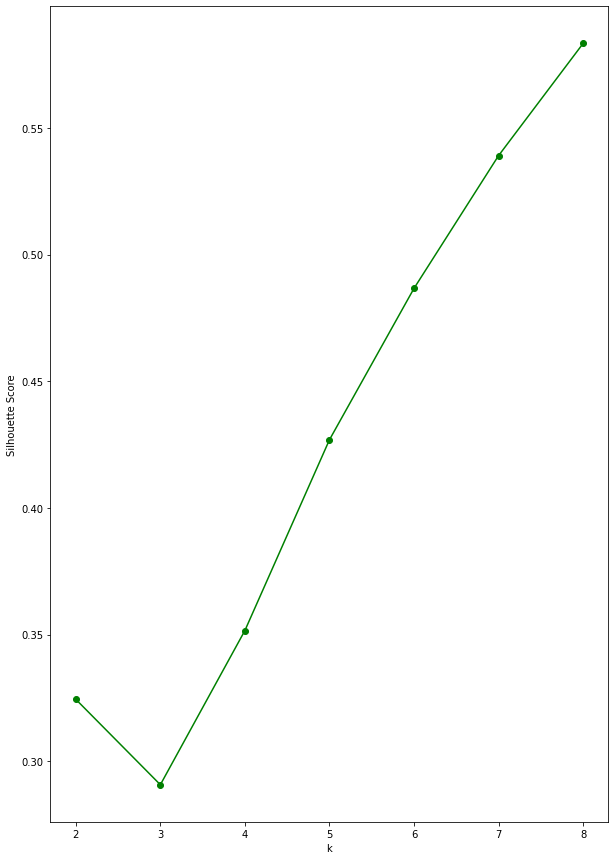

In [224]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟข้างต้นจะเห็นได้ว่า k มีทั้งหมด 3 กลุ่ม ซึ่งดูจากจุดที่มีระยะห่างแตกต่างกันใน 3 ช่วงโดยจุดที่ 3 นั้นมีค่าใกล้เคียงกันกับจุดที่ 4,5 ช่วงที่ k เท่ากับ 2,3,5

In [225]:
matplotlib.rcParams['figure.figsize']=[10,15]

Text(0, 0.5, 'Y')

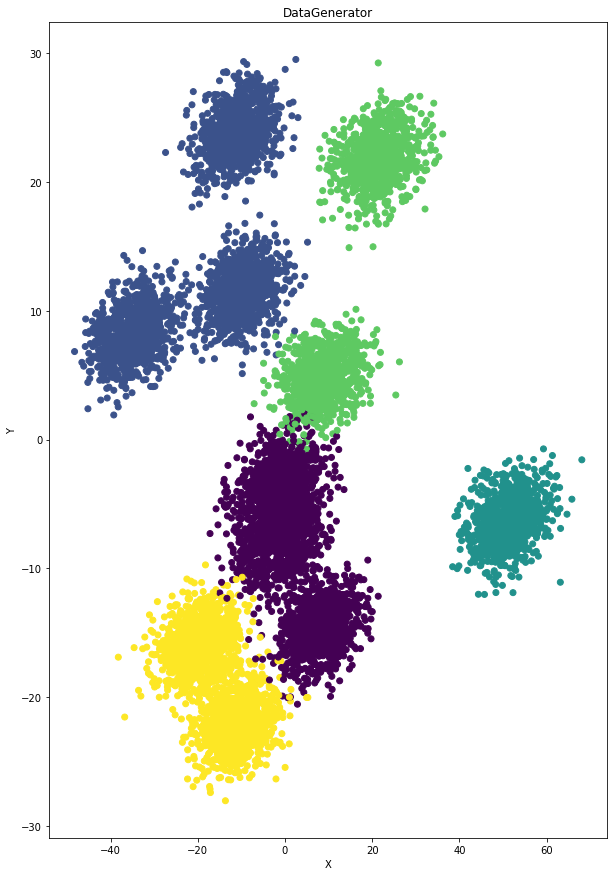

In [230]:
kmeans=KMeans(n_clusters=5,random_state=2021)
kmeans.fit(Data)
y=kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

จากกราฟข้างต้นจะเห็นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 5 กลุ่ม ซึ่งจะมีข้อมูลในจำนวนที่ซ้อนทับกันอยู่และจะเห็นได้ว่าข้อมูลนั้นมีปริมาณที่มาก

**ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

In [231]:
from sklearn.manifold import MDS

In [232]:
mds=MDS(n_components=2)

**K-Mean**